In [40]:
import pandas as pd

df = pd.read_csv("/content/train_lazada3_noprocess.csv")
df_test = pd.read_csv("/content/test_lazada3_noprocess.csv")

# Without preprocessing

## Modelling

In [41]:
df_train = df.copy()
df_train["Review"] = df_train["Review"].str.lower()
df_train

,Review,Label
0,"barang tidak pernah sampai yg hitam,yg putih g...",negatif
1,"pengiriman cepat, packing cukup bagus",positif
2,ok mantap ... good,positif
3,barang sampai dengan aman. kemampuan laptop se...,positif
4,"puas bgt pengiriman sesuai jadwal, barang bagu...",positif
...,...,...
115,jangan di beli gan,negatif
116,"baguss bangett kurir nya jga ramah, cakep pula...",positif
117,jangan pernah beli disini..parah banget..baran...,negatif
118,"senang belanja disini,pelayanan oke,barang ses...",positif


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from numpy import mean
from numpy import std

In [43]:
CountVector_nopro = CountVectorizer(ngram_range=(1,1))
TfidfVector_nopro = TfidfVectorizer(ngram_range=(1,1))

In [44]:
X_count_nopro = CountVector_nopro.fit_transform(df_train["Review"])
X_tfidf_nopro = TfidfVector_nopro.fit_transform(df_train["Review"])

### Count

#### Count with Naive bayes

In [45]:
NBmodelCount_nopro = MultinomialNB()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores_NBcount_nopro = cross_val_score(NBmodelCount_nopro, X_count_nopro.toarray(), df_train["Label"], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_NBcount_nopro), std(scores_NBcount_nopro)))
NBmodelCount_nopro.fit(X_count_nopro.toarray(), df_train["Label"])

Accuracy: 0.850 (0.143)


MultinomialNB()

#### Count with SVM

In [46]:
SVMmodelCount_nopro = svm.SVC(kernel="linear")
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores_SVMcount_nopro = cross_val_score(SVMmodelCount_nopro, X_count_nopro.toarray(), df_train["Label"], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_SVMcount_nopro), std(scores_SVMcount_nopro)))
SVMmodelCount_nopro.fit(X_count_nopro.toarray(), df_train["Label"])

Accuracy: 0.808 (0.124)


SVC(kernel='linear')

### TFIDF

#### Tfidf Naive bayes

In [47]:
NBmodelTfidf_nopro = MultinomialNB()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores_NBtfidf_nopro = cross_val_score(NBmodelTfidf_nopro, X_tfidf_nopro.toarray(), df_train["Label"], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_NBtfidf_nopro), std(scores_NBtfidf_nopro)))
NBmodelTfidf_nopro.fit(X_tfidf_nopro.toarray(), df_train["Label"])

Accuracy: 0.817 (0.157)


MultinomialNB()

#### Tfidf with SVM

In [48]:
SVMmodelTfidf_nopro = svm.SVC(kernel="linear")
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores_SVMtfidf_nopro = cross_val_score(SVMmodelTfidf_nopro, X_tfidf_nopro.toarray(), df_train["Label"], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_SVMtfidf_nopro), std(scores_SVMtfidf_nopro)))
SVMmodelTfidf_nopro.fit(X_tfidf_nopro.toarray(), df_train["Label"])

Accuracy: 0.850 (0.128)


SVC(kernel='linear')

## Testing

In [49]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

test_count_nopro = CountVector_nopro.transform(df_test["Review"]).toarray()
test_tfidf_nopro = TfidfVector_nopro.transform(df_test["Review"]).toarray()

In [50]:
y_true = df_test["Label"]
y_NBcount_nopro = NBmodelCount_nopro.predict(test_count_nopro)
y_SVMcount_nopro = SVMmodelCount_nopro.predict(test_count_nopro)
y_NBtfidf_nopro = NBmodelTfidf_nopro.predict(test_tfidf_nopro)
y_SVMtfidf_nopro = SVMmodelTfidf_nopro.predict(test_tfidf_nopro)

In [51]:
metrics_NBcount_nopro = ["NBcount",
                         accuracy_score(y_true, y_NBcount_nopro), 
                         precision_score(y_true, y_NBcount_nopro, average='weighted'), 
                         recall_score(y_true, y_NBcount_nopro, average='weighted'), 
                         f1_score(y_true, y_NBcount_nopro, average='weighted')]

metrics_SVMcount_nopro = ["SVMcount",
                          accuracy_score(y_true, y_SVMcount_nopro), 
                          precision_score(y_true, y_SVMcount_nopro, average='weighted'),
                          recall_score(y_true, y_SVMcount_nopro, average='weighted'), 
                          f1_score(y_true, y_SVMcount_nopro, average='weighted')]

metrics_NBtfidf_nopro = ["NBtfidf",
                         accuracy_score(y_true, y_NBtfidf_nopro), 
                         precision_score(y_true, y_NBtfidf_nopro, average='weighted'), 
                         recall_score(y_true, y_NBtfidf_nopro, average='weighted'), 
                         f1_score(y_true, y_NBtfidf_nopro, average='weighted')]

metrics_SVMtfidf_nopro = ["SVMtfidf",
                          accuracy_score(y_true, y_SVMtfidf_nopro), 
                          precision_score(y_true, y_SVMtfidf_nopro, average='weighted'), 
                          recall_score(y_true, y_SVMtfidf_nopro, average='weighted'), 
                          f1_score(y_true, y_SVMtfidf_nopro, average='weighted')]

# With Processing


## Preprocessing

In [52]:
train = df.copy()
test = df_test.copy()

In [53]:
!pip install sastrawi

import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [54]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

def stemming(word):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return stemmer.stem(word)

list_stopwords = set(stopwords.words('indonesian'))

def remove_stopword(sentence):
  processed_test = []
  tokens = word_tokenize(sentence)
  filtered = [word for word in tokens if word not in list_stopwords]
  return " ".join(filtered)

In [55]:
import string

train["Review"] = train["Review"].str.lower()
train["Review"] = train['Review'].str.replace('[{}]'.format(string.punctuation), '')
train['Review'] = train['Review'].apply(stemming)
train['Review'] = train['Review'].apply(remove_stopword)

test["Review"] = test["Review"].str.lower()
test["Review"] = test['Review'].str.replace('[{}]'.format(string.punctuation), '')
test['Review'] = test['Review'].apply(stemming)
test['Review'] = test['Review'].apply(remove_stopword)

## Modelling


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from numpy import mean
from numpy import std

In [57]:
CountVector_withpro = CountVectorizer(ngram_range=(1,1))
TfidfVector_withpro = TfidfVectorizer(ngram_range=(1,1))

In [58]:
X_count_withpro = CountVector_withpro.fit_transform(train["Review"])
X_tfidf_withpro= TfidfVector_withpro.fit_transform(train["Review"])

### Count

#### Count with Naive bayes

In [59]:
NBmodelCount_withpro = MultinomialNB()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores_NBcount_withpro = cross_val_score(NBmodelCount_withpro, X_count_withpro.toarray(), train["Label"], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_NBcount_withpro), std(scores_NBcount_withpro)))
NBmodelCount_withpro.fit(X_count_withpro.toarray(), train["Label"])

Accuracy: 0.767 (0.138)


MultinomialNB()

#### Count with SVM

In [60]:
SVMmodelCount_withpro = svm.SVC(kernel="linear")
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores_SVMcount_withpro = cross_val_score(SVMmodelCount_withpro, X_count_withpro.toarray(), train["Label"], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_SVMcount_withpro), std(scores_SVMcount_withpro)))
SVMmodelCount_withpro.fit(X_count_withpro.toarray(), train["Label"])

Accuracy: 0.708 (0.093)


SVC(kernel='linear')

### TFIDF

#### Tfidf Naive bayes

In [61]:
NBmodelTfidf_withpro = MultinomialNB()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores_NBtfidf_withpro = cross_val_score(NBmodelTfidf_withpro, X_tfidf_withpro.toarray(), train["Label"], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_NBtfidf_withpro), std(scores_NBtfidf_withpro)))
NBmodelTfidf_withpro.fit(X_tfidf_withpro.toarray(), train["Label"])

Accuracy: 0.708 (0.141)


MultinomialNB()

#### Tfidf with SVM

In [62]:
SVMmodelTfidf_withpro = svm.SVC(kernel="linear")
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores_SVMtfidf_withpro = cross_val_score(SVMmodelTfidf_withpro, X_tfidf_withpro.toarray(), train["Label"], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores_SVMtfidf_withpro), std(scores_SVMtfidf_withpro)))
SVMmodelTfidf_withpro.fit(X_tfidf_withpro.toarray(), train["Label"])

Accuracy: 0.775 (0.092)


SVC(kernel='linear')

## Testing

In [63]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

test_count_withpro = CountVector_withpro.transform(test["Review"]).toarray()
test_tfidf_withpro = TfidfVector_withpro.transform(test["Review"]).toarray()

In [64]:
y_true = test["Label"]
y_NBcount_withpro = NBmodelCount_withpro.predict(test_count_withpro)
y_SVMcount_withpro = SVMmodelCount_withpro.predict(test_count_withpro)
y_NBtfidf_withpro = NBmodelTfidf_withpro.predict(test_tfidf_withpro)
y_SVMtfidf_withpro = SVMmodelTfidf_withpro.predict(test_tfidf_withpro)

In [65]:
metrics_NBcount_withpro = ["NBcount",
                           accuracy_score(y_true, y_NBcount_withpro), 
                           precision_score(y_true, y_NBcount_withpro, average='weighted'), 
                           recall_score(y_true, y_NBcount_withpro, average='weighted'), 
                           f1_score(y_true, y_NBcount_withpro, average='weighted')]

metrics_SVMcount_withpro = ["SVMcount",
                            accuracy_score(y_true, y_SVMcount_withpro), 
                            precision_score(y_true, y_SVMcount_withpro, average='weighted'),
                            recall_score(y_true, y_SVMcount_withpro, average='weighted'), 
                            f1_score(y_true, y_SVMcount_withpro, average='weighted')]

metrics_NBtfidf_withpro = ["NBtfidf",
                           accuracy_score(y_true, y_NBtfidf_withpro), 
                           precision_score(y_true, y_NBtfidf_withpro, average='weighted'), 
                           recall_score(y_true, y_NBtfidf_withpro, average='weighted'), 
                           f1_score(y_true, y_NBtfidf_withpro, average='weighted')]

metrics_SVMtfidf_withpro = ["SVMtfidf",
                            accuracy_score(y_true, y_SVMtfidf_withpro), 
                            precision_score(y_true, y_SVMtfidf_withpro, average='weighted'), 
                            recall_score(y_true, y_SVMtfidf_withpro, average='weighted'), 
                            f1_score(y_true, y_SVMtfidf_withpro, average='weighted')]

# Visualization result

## Cross validation

### without processing

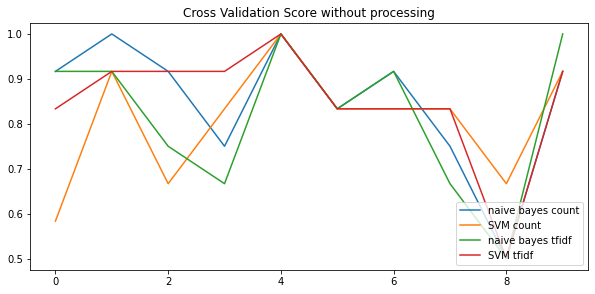

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)

plt.plot(scores_NBcount_nopro, label='naive bayes count')
plt.plot(scores_SVMcount_nopro, label='SVM count')
plt.plot(scores_NBtfidf_nopro, label='naive bayes tfidf')
plt.plot(scores_SVMtfidf_nopro, label='SVM tfidf')

plt.legend(loc='lower right')
plt.title("Cross Validation Score without processing")
plt.show()

### with processing

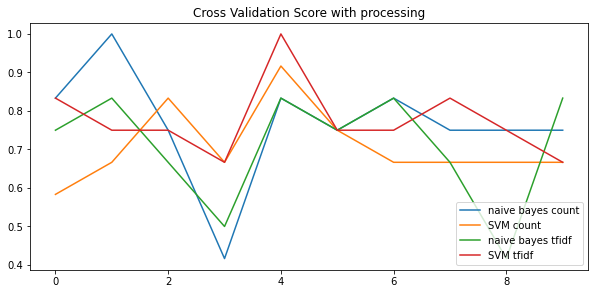

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)

plt.plot(scores_NBcount_withpro, label='naive bayes count')
plt.plot(scores_SVMcount_withpro, label='SVM count')
plt.plot(scores_NBtfidf_withpro, label='naive bayes tfidf')
plt.plot(scores_SVMtfidf_withpro, label='SVM tfidf')

plt.legend(loc='lower right')
plt.title("Cross Validation Score with processing")
plt.show()

## Table benchmarks metrics

### without processing

In [68]:
from prettytable import PrettyTable
    
x_no = PrettyTable()

x_no.field_names = ["Label","Accuracy", "Precission", "Recall", "F1_score"]

x_no.add_row(metrics_NBcount_nopro)
x_no.add_row(metrics_SVMcount_nopro)
x_no.add_row(metrics_NBtfidf_nopro)
x_no.add_row(metrics_SVMtfidf_nopro)

print(x_no)

+----------+----------+--------------------+--------+--------------------+
|  Label   | Accuracy |     Precission     | Recall |      F1_score      |
+----------+----------+--------------------+--------+--------------------+
| NBcount  |  0.925   | 0.9262499999999999 | 0.925  | 0.925046904315197  |
| SVMcount |  0.925   | 0.9262499999999999 | 0.925  | 0.925046904315197  |
| NBtfidf  |  0.875   | 0.9010416666666666 | 0.875  | 0.8738214959145193 |
| SVMtfidf |   0.95   | 0.9547619047619047 |  0.95  |        0.95        |
+----------+----------+--------------------+--------+--------------------+


### with processing

In [69]:
from prettytable import PrettyTable
    
x_with = PrettyTable()

x_with.field_names = ["Label","Accuracy", "Precission", "Recall", "F1_score"]

x_with.add_row(metrics_NBcount_withpro)
x_with.add_row(metrics_SVMcount_withpro)
x_with.add_row(metrics_NBtfidf_withpro)
x_with.add_row(metrics_SVMtfidf_withpro)

print(x_with)

+----------+----------+--------------------+--------+--------------------+
|  Label   | Accuracy |     Precission     | Recall |      F1_score      |
+----------+----------+--------------------+--------+--------------------+
| NBcount  |   0.75   | 0.8012820512820513 |  0.75  | 0.7423273657289002 |
| SVMcount |  0.725   | 0.7248737373737374 | 0.725  | 0.7244814582023885 |
| NBtfidf  |   0.75   | 0.8012820512820513 |  0.75  | 0.7423273657289002 |
| SVMtfidf |   0.8    | 0.8143222506393861 |  0.8   | 0.7989974937343358 |
+----------+----------+--------------------+--------+--------------------+
